Linear Regression Results:
Mean Squared Error (MSE): 16.10805
Mean Absolute Error (MAE): 1.45784
R-squared Score: 0.99976

Support Vector Machine (SVR) Results:
Mean Squared Error (MSE): 844.45876
Mean Absolute Error (MAE): 7.64086
R-squared Score: 0.98744


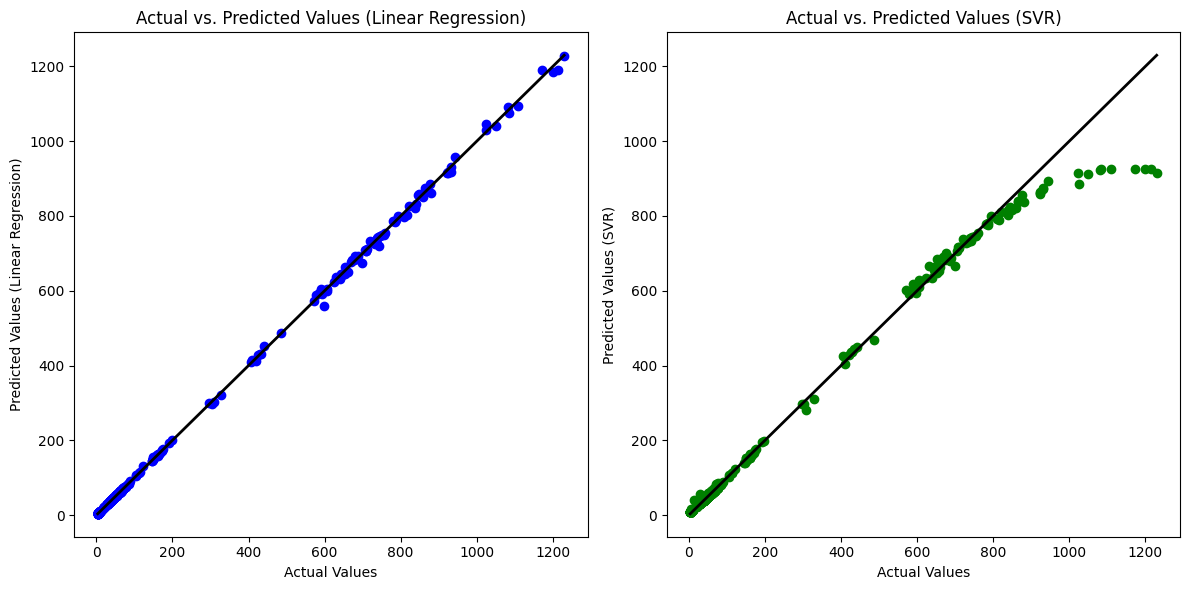

In [16]:
#YATHAMSHETTY RITHWIK
#2203A52189
#I)LINEAR REGRESSION
#II)SUPPORT VECTOR MACHINE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/TSLA.csv')
df.head(3)
df = df.drop(['Date'], axis=1)
y = df["Close"]
x = df.drop(["Close", "Adj Close"], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2)
linear_model = LinearRegression()
linear_model.fit(xTrain, yTrain)
y_pred_linear = linear_model.predict(xTest)
mse_linear = mean_squared_error(yTest, y_pred_linear)
mae_linear = mean_absolute_error(yTest, y_pred_linear)
r2_linear = r2_score(yTest, y_pred_linear)
svr_model = SVR(kernel='rbf')
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(svr_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(xTrain, yTrain)
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(xTest)
mse_svr = mean_squared_error(yTest, y_pred_svr)
mae_svr = mean_absolute_error(yTest, y_pred_svr)
r2_svr = r2_score(yTest, y_pred_svr)
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear:.5f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.5f}")
print(f"R-squared Score: {r2_linear:.5f}")
print("\nSupport Vector Machine (SVR) Results:")
print(f"Mean Squared Error (MSE): {mse_svr:.5f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.5f}")
print(f"R-squared Score: {r2_svr:.5f}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(yTest, y_pred_linear, c='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Linear Regression)")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.subplot(1, 2, 2)
plt.scatter(yTest, y_pred_svr, c='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (SVR)")
plt.title("Actual vs. Predicted Values (SVR)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.tight_layout()
plt.show()

Manually Computed Linear Regression Results:
Mean Squared Error (MSE): 2802.71852
Mean Absolute Error (MAE): 24.24887
R-squared Score: 0.95065


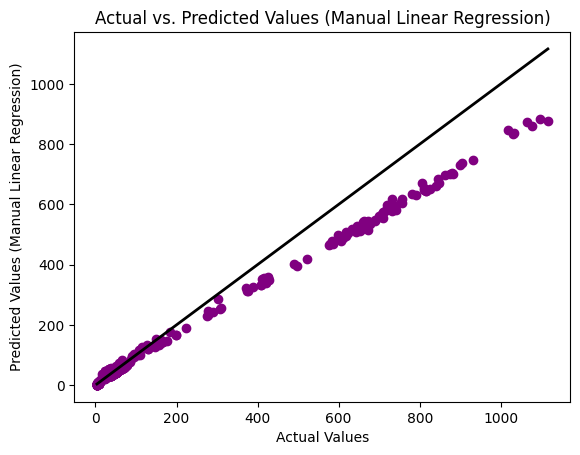

In [17]:
#YATHAMSHETTY RITHWIK
#2203A52189
#III)LINEAR REGRESSION BY MANUAL METHOD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv('/content/TSLA.csv')
df.head(3)
df = df.drop(['Date'], axis=1)
y = df["Close"]
x = df.drop(["Close", "Adj Close"], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y, test_size=0.2)
def manual(x, y, learning_rate, iterations):
    m, n = x.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(iterations):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        gradient = (1 / m) * np.dot(x.T, error)
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)
    return theta, cost_history
learning_rate = 0.01
iterations = 1000
theta, _ = manual(xTrain, yTrain, learning_rate, iterations)
y_pred_manual = np.dot(xTest, theta)
mse_manual = mean_squared_error(yTest, y_pred_manual)
mae_manual = mean_absolute_error(yTest, y_pred_manual)
r2_manual = r2_score(yTest, y_pred_manual)
print("Manually Computed Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_manual:.5f}")
print(f"Mean Absolute Error (MAE): {mae_manual:.5f}")
print(f"R-squared Score: {r2_manual:.5f}")
plt.scatter(yTest, y_pred_manual, c='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Manual Linear Regression)")
plt.title("Actual vs. Predicted Values (Manual Linear Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)
plt.show()